In [2]:
from src import *

## Description

We are mainly empirically comparing Jaccknife sampling versus fixed sliding window.

GOAL: Compare methods and select the most time resolute (best time resolution) while having smooth dynamic connectivity

## Table of Contents
- [Rest types comparison](#rest)

- [Movie types comparison](#movie)

In [3]:
mri_path = "./data/fmri_compile.csv"
mri_df   = pd.read_csv(mri_path)

### Rest types comparison

In [4]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

filename_rest        = 'TC_400_sub-S23_ses-1_Rest.csv'
rest_series, rest_df = df_to_timeseries(mri_df, filename_rest)
fc_rest              = correlation_measure.fit_transform([rest_series])[0]

In [47]:
# variable for dFC
ws   = 250
step = 1 # let's overlap pretty much all for now to see smoothness
nbr, nbt = rest_series.T.shape

In [48]:
dFC_rest = np.zeros((nbt // step + 1 - ws, nbr,nbr))

for c, sidx in enumerate(range(0, nbt, step)):
    T = rest_series[sidx:sidx+ws]
    if T.shape[0] != ws: 
        continue
    correlation_measure = ConnectivityMeasure(kind='correlation')
    dFC_rest[c] = correlation_measure.fit_transform([T])[0]

In [49]:
dFC_rest2 = np.zeros((nbt, nbr,nbr))
for sidx in range(0, nbt):
    # Jackknife sampling
    T = np.concatenate([rest_series[:sidx], rest_series[sidx+1:]])
    correlation_measure = ConnectivityMeasure(kind='correlation')
    dFC_rest2[sidx] = -correlation_measure.fit_transform([T])[0]

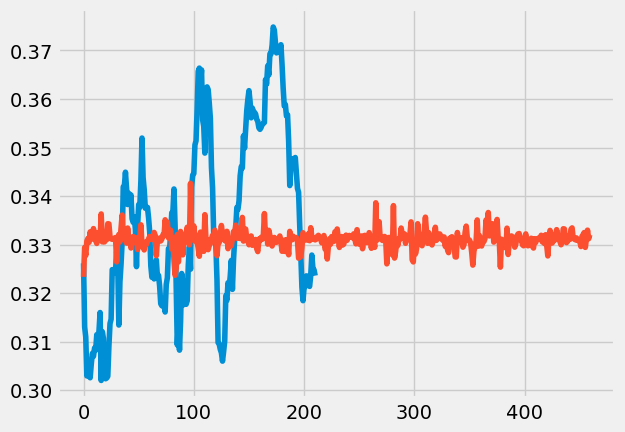

In [53]:
plt.plot(dFC_rest[:,0,110])
plt.plot(np.abs(dFC_rest2[:,0,110]))

### Movie types comparison

In [41]:
filename_movie         = 'TC_400_sub-S09_ses-4_Sintel.csv'
movie_series, movie_df = df_to_timeseries(mri_df, filename_movie)
fc_movie               = correlation_measure.fit_transform([movie_series])[0]

In [42]:
# variable for dFC
ws   = 250
step = 1 # let's overlap pretty much all for now to see smoothness
nbr, nbt = movie_series.T.shape

In [43]:
dFC_movie = np.zeros((nbt // step + 1 - ws, nbr,nbr))

for c, sidx in enumerate(range(0, nbt, step)):
    T = movie_series[sidx:sidx+ws]
    if T.shape[0] != ws: 
        continue
    correlation_measure = ConnectivityMeasure(kind='correlation')
    dFC_movie[c] = correlation_measure.fit_transform([T])[0]

In [44]:
dFC_movie2 = np.zeros((nbt, nbr,nbr))
for sidx in range(0, nbt):
    # Jackknife sampling
    T = np.concatenate([movie_series[:sidx], movie_series[sidx+1:]])
    correlation_measure = ConnectivityMeasure(kind='correlation')
    dFC_movie2[sidx] = -correlation_measure.fit_transform([T])[0]

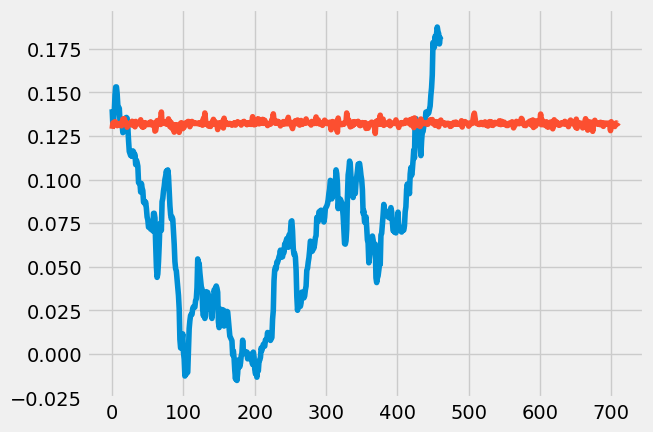

In [55]:
plt.plot(dFC_movie[:,0,110])
plt.plot(np.abs(dFC_movie2[:,0,110]))